# Day 3

This task is about basic graph representation and traversal, demonstrated with the map of London's underground system, "the Tube".

## London Tube map

London's underground has considerable complexity, and navigating it is a challenge.

<img src="https://media.timeout.com/images/104710384/630/472/image.jpg" width=45%>
Let us download a dataset representing it (in it's 2014 state), and work with it as a graph!

But first, we have to define, what a graph is!

In [1]:
class GraphNode:
    ''' A node for the Graph class 
        representing the station name, geographical coordinates
        and list of immediate neighbors'''
    def __init__(self, station_id=None, name=None, x=None, y=None, neighbor_nodes=None):
        self.station_id = station_id
        self.name = name #as name implies
        self.x = x #longitude
        self.y = y #latitude
        self.neighbor_nodes = [] #the list pointing to the station's direct neighbors

    def __repr__(self):
        ''' Returns data instead of the GraphNode object's default printable representation
            This is just a nice method for a more "tidy" printout.'''
        return repr(self.name)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


class Graph:
    """The main container object for our task
       It contains as attributes a list of nodes, which in turn point to ech-other in ther respective
       neigbhbors attribute.
       Also, it exposes utilities for creating, manipulating and plotting the graph."""
    
    def __init__(self, stations_dataframe=None, edges_dataframe=None):
        """Runs when the node class is being instantiated.
           Optionally takes in two datafranes we have loaded from disc,
           For the stations data, it describes the individual graph nodes,
           and for the connections their edges."""
        
        self.nodes = []
        
        if stations_dataframe is not None:   
            self.add_nodes_from_dataframe(stations_dataframe)
            
            if edges_dataframe is not None:
                self.add_edges_from_dataframe(edges_dataframe)
                
        #Just here for pedagogical purposes to make aware, that in OOP, the operations of a method 
        #can have effect on the object-s state, hence the function return values can often be empty.
        return
    
    def add_nodes_from_dataframe(self, stations_dataframe):
        """Utility function for iteratin through a stations dataframe,
           and creating GraphNodes for each row in the input table."""
        
        for row_counter, row_data in stations_dataframe.iterrows():
            node = GraphNode(station_id=row_counter, name=row_data['name'], x=row_data['longitude'], y=row_data['latitude'])
            self.nodes.append(node)

        return

    def get_station_by_id(self, searched_id):
        """Getter function for retrieval of a node with a given station_id."""
        
        for node in self.nodes:
            if searched_id == node.station_id:
                return node
    # Note: we could potentially use a more efficient way here, if we could assume, that the index position
    # of the given node in the self.nodes list is always corresponding to it's station_id. Turns out to be, 
    # that somehow,
    # the station with the id of 189 is missing from London, so if we would implement it that way, 
    # we would run into nice indexing problems. 
    # For the time being, we stick with this rather ugly way of lookup
    # with O(n) complexity.

    def get_station_by_name(self, name):
        ''' Find node by name '''

        station_node = next(filter(lambda x: x.name == name,  self.nodes))
        return station_node
    # Note: equivalent of the previous for loops, just written in a more functional programming style.
    
    def add_edge_between_nodes(self, node1, node2):
        """Utility for adding a mutual relationship between two nodes"""
        
        if node2 not in node1.neighbor_nodes:
            node1.neighbor_nodes.append(node2)

        if node1 not in node2.neighbor_nodes:
            node2.neighbor_nodes.append(node1)        

        return
    
    def add_edges_from_dataframe(self, edges_dataframe):
        """Utility function for processing the loaded connections dataframe.
           It iterates through connections, gets the appropriate nodes by id and connects them."""
        
        # Add neighbour information to nodes
        for row_counter, row_data in edges_dataframe.iterrows():
            # Get station name from the station ID
            station_1_nbr = row_data['station1']
            station_2_nbr = row_data['station2']
                      
            # Get node with the same id
            station_node_1 = self.get_station_by_id(station_1_nbr)
            station_node_2 = self.get_station_by_id(station_2_nbr)

            self.add_edge_between_nodes(station_node_1, station_node_2)

        return


    def breadth_first_traversal(self):
        '''Implement breadth-first traversal to find all nodes.'''
        # Start with an empty list of already visited nodes
        visited_nodes = []
        
        # And a list of nodes to be investigated, containing a chosen node, eg. the first.
        queue = [self.nodes[0]]
        
        # Run a loop until no more node is left to be investigated in the queue
        while queue:
            # Get first item from queue and call it current
            current = queue[0]
            
            # Remove current item from queue
            queue = queue[1:]
            
            # Put current to visited list
            visited_nodes.append(current)
            
            # Iterate on the neighbors of the current node
            for neighbor in current.neighbor_nodes:
                # Put current's neighbors in queue if they were not visited before and not in the queue
                if neighbor not in visited_nodes and neighbor not in queue:
                    queue.append(neighbor)
        
        return visited_nodes
    
    def depth_first_traversal(self):
        '''Implement depth-first traversal to find all nodes.'''
        # Start with an empty list of already visited nodes
        visited_nodes = []
        
        # And a stack of nodes to be investigated, containing a chosen node, eg. the first.
        stack = [self.nodes[0]]
        
        # Run a loop until no more node is left to be investigated in the stack
        while stack:
            # Get last item from stack and call it current
            current = stack[-1]
            
            # Remove current item from stack
            stack = stack[:-1]
            
            # Put current to visited list
            visited_nodes.append(current)
            
            # Iterate on the neighbors of the current node
            for neighbor in current.neighbor_nodes:
                # Put current's neighbors in stack if they were not visited before and not in the stack
                if neighbor not in visited_nodes and neighbor not in stack:
                    stack.append(neighbor)
        
        return visited_nodes

        

    
    def plot(self, color='lightblue'):
        ''' Utility for the graph to plot stself.
            It depends on breadth_first_traversal to be implemented to run,
            and uses Seaborn for style and Matplotlib for plotting.'''
        
        # Plot settings
        sns.set(rc={'figure.figsize':(20,10)})
        sns.set_style("whitegrid")

        # Plot graph
        node_x = []
        node_y = []
        for node in self.breadth_first_traversal():
            # Save data for displaying node positions
            node_x.append(node.x)
            node_y.append(node.y)

            # Plot connections
            for nn in node.neighbor_nodes:
                 plt.plot([node.x, nn.x], [node.y, nn.y], c=color, lw=1)

        # Plot nodes
        plt.scatter(x=node_x, y=node_y, s=10)

# Downloading and checking data

In [10]:
#!wget https://raw.githubusercontent.com/nicola/tubemaps/master/datasets/london.lines.csv
#!wget https://raw.githubusercontent.com/nicola/tubemaps/master/datasets/london.stations.csv
#!wget https://raw.githubusercontent.com/nicola/tubemaps/master/datasets/london.connections.csv

In [11]:
# We use Pandas for the loading of the London tube dataset.
import pandas as pd

# This dataset is from https://github.com/nicola/tubemaps
# Last updated in 2014!
lines       = pd.read_csv('london.lines.csv', index_col=0)
stations    = pd.read_csv('london.stations.csv', index_col=0)
connections = pd.read_csv('london.connections.csv')

## Let's get a glimpse on the station coordinates!

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

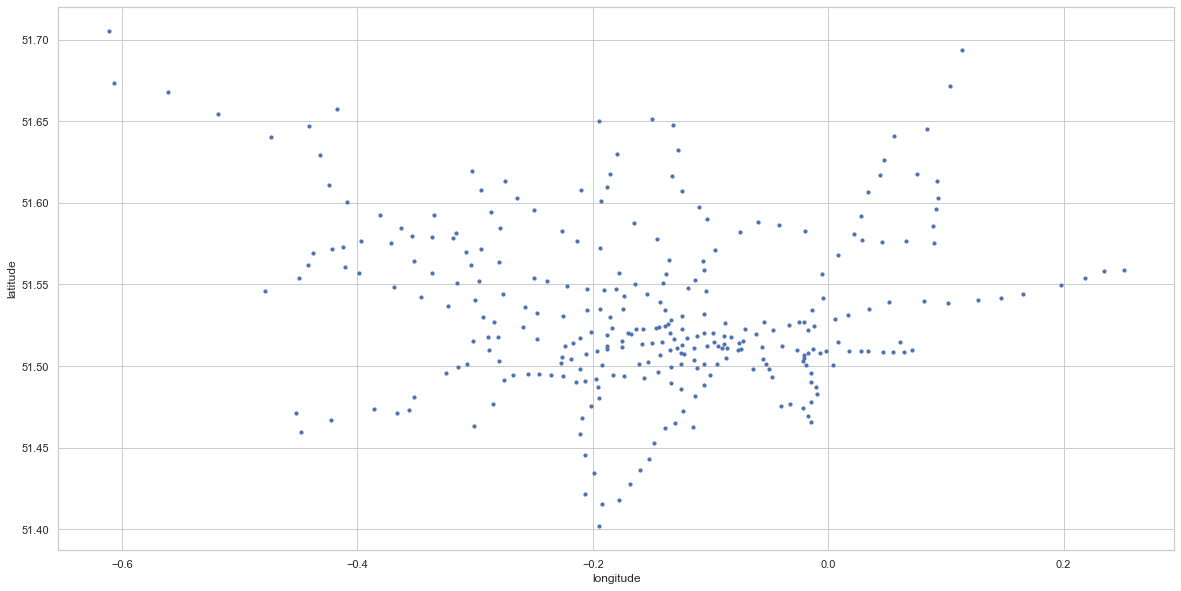

In [12]:
# Station position in classic map style(up - north, right - east)
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")
stations.plot.scatter(x='longitude', y='latitude', s=10)

## Let's use our Graph class to store the data

In [13]:
tube_graph = Graph(stations_dataframe=stations, edges_dataframe=connections)

In [14]:
# If you have trouble to see, what is what, just use:
tube_graph.get_station_by_id(11)

'Baker Street'

In [15]:
# or
tube_graph.get_station_by_name("Baker Street").neighbor_nodes

['Marylebone',
 "Regent's Park",
 'Edgware Road (C)',
 'Great Portland Street',
 'Bond Street',
 "St. John's Wood",
 'Finchley Road']

In [16]:
#.... TODO: Scroll up, and implement the breadth_first_traversal and breadth_first_traversal before you go further!
# If you are successfull, you will see the tube map below!

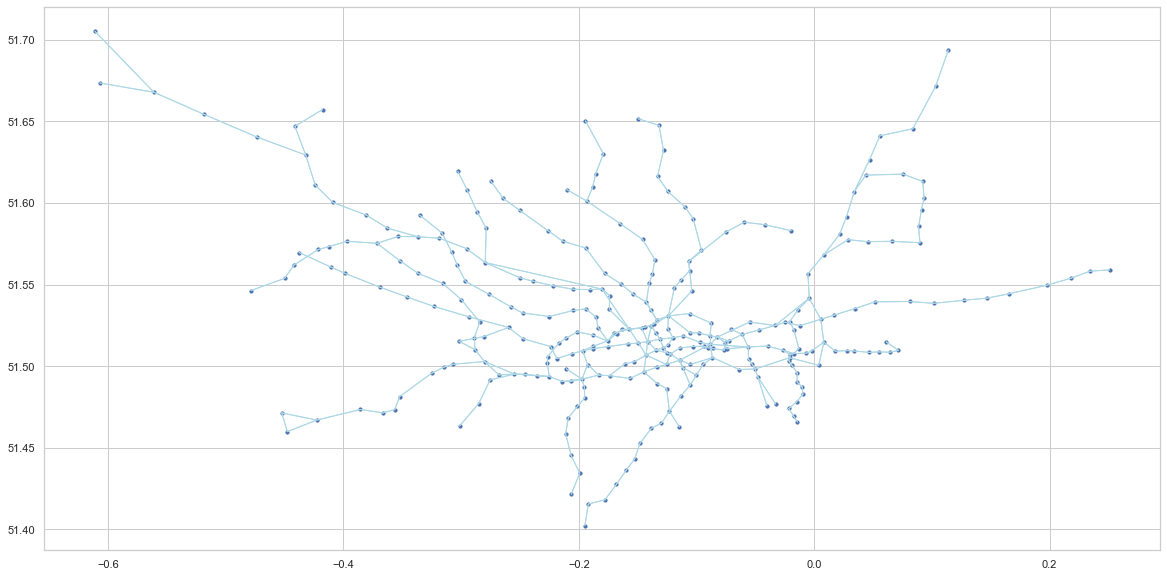

In [17]:
tube_graph.plot()

Just in case, manual sanity check, looking at the first connection, and then at the real Tube map of the appropriate line from [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Bakerloo_Line.svg/1100px-Bakerloo_Line.svg.png).

In [18]:
print(connections.head(1))

   station1  station2  line  time
0        11       163     1     1


In [19]:
tube_graph.get_station_by_id(11)

'Baker Street'

In [20]:
tube_graph.get_station_by_id(163)

'Marylebone'

In [21]:
print(lines)

                         name  colour  stripe
line                                         
1               Bakerloo Line  AE6017     NaN
3                 Circle Line  FFE02B     NaN
6     Hammersmith & City Line  F491A8     NaN
7                Jubilee Line  949699     NaN
11              Victoria Line  0A9CDA     NaN
2                Central Line  F15B2E     NaN
4               District Line  00A166     NaN
5            East London Line  FBAE34     NaN
8           Metropolitan Line  91005A     NaN
9               Northern Line  000000     NaN
10            Piccadilly Line  094FA3     NaN
12       Waterloo & City Line  88D0C4     NaN
13    Docklands Light Railway  00A77E  FFFFFF


<img src="http://drive.google.com/uc?export=view&id=1VENpIG1bkeEktN_AJNQqyD7Exr9-0Pj6" width=65%>

### Observe runtime of traversals

#### Breath first search

In [22]:
%%timeit -n 1000 -r 7
tube_graph.breadth_first_traversal()

1.26 ms ± 55.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Depth first search

In [23]:
%%timeit -n 1000 -r 7
tube_graph.depth_first_traversal()

1.25 ms ± 44.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Adjacency matrix representation

## Manually creating a dummy graph for testing

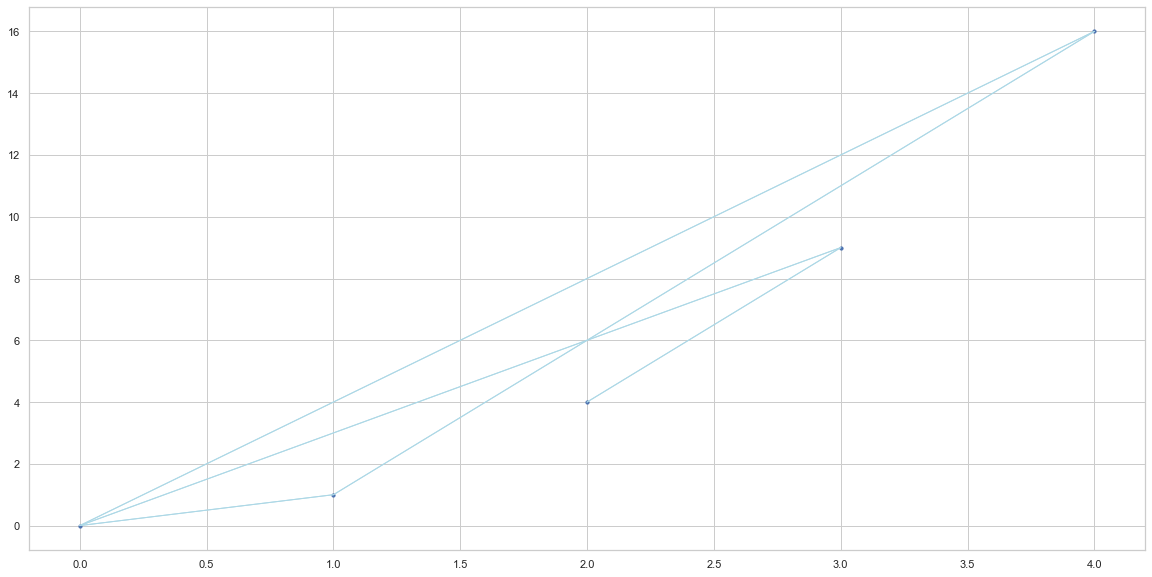

In [24]:
# Create empty graph
dummy_graph = Graph()

# Create nodes without defining neighbour nodes
nodes = []
for i in range(5):
    node = GraphNode(name='dummy node ' + str(i), x=i, y=i*i)
    nodes.append(node)

# Set edges
nodes[0].neighbor_nodes = [nodes[1], nodes[3], nodes[4]]
nodes[1].neighbor_nodes = [nodes[0], nodes[4]]
nodes[2].neighbor_nodes = [nodes[3]]
nodes[3].neighbor_nodes = [nodes[0], nodes[2]]
nodes[4].neighbor_nodes = [nodes[0], nodes[1]]

dummy_graph.nodes = nodes

# Plot graph
dummy_graph.plot()

## Implement adjacency matrix based graph

In [25]:
import numpy as np

class AdjMatGraph:
    '''
    Implements Graph funcionalities
    Adjacency matrix based representation
    '''

    def __init__(self):
        self.adjacency_matrix = None
    def import_graph(self, graph):
        '''
        Creates adjacency matrix from an existing graph object.
        '''

        # Get all nodes with your favourite traversal
        node_list = graph.breadth_first_traversal() # for example

        # Create a numpy square matrix full of zeroes
        # with the size appropriate to store every connection with everyone 
        n = len(node_list)
        self.adjacency_matrix = np.zeros((n, n), dtype=int)

        # Fill in the matrix iteratively by iterating on the nodes in the node_list
        for i, node in enumerate(node_list):
            # And for each node, taking its edges iteratively
            for neighbor in node.neighbor_nodes:
                # Using the node's index as one "coordinate"
                x = i
                # Using the neighbor's index as the other
                y = node_list.index(neighbor)
                # and setting the relationship between them to 1 in the adjacency matrix
                self.adjacency_matrix[x, y] = 1

In [26]:
# Init an adjacency matrix based graph object
graph_v2 = AdjMatGraph()

In [27]:
# Check your adjacency matrix generating function with a simple graph
graph_v2.import_graph(dummy_graph)

print('Adjacency matrix of dummy graph:')
print(graph_v2.adjacency_matrix)

Adjacency matrix of dummy graph:
[[0 1 1 1 0]
 [1 0 0 1 0]
 [1 0 0 0 1]
 [1 1 0 0 0]
 [0 0 1 0 0]]


In [28]:
# Tube adjacency matrix
graph_v2.import_graph(tube_graph)

print('Shape of tube adjacency matrix:')
print(graph_v2.adjacency_matrix.shape)
print('Tube adjacency matrix:')
print(graph_v2.adjacency_matrix)

Shape of tube adjacency matrix:
(302, 302)
Tube adjacency matrix:
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]
